In [ ]:
import yfinance as yf

# Fetch stock price data for a specific ticker (e.g., Reliance Industries)
ticker = "RELIANCE.NS"  # NSE ticker for Reliance Industries
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Display the first few rows of the data
print(data.head(10))

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2020-01-01  671.136353  678.916500  669.313631  674.870828    14004468
2020-01-02  682.562134  685.074023  672.203442  672.203442    17710316
2020-01-03  683.384521  685.385129  677.093701  681.539482    20984698
2020-01-06  667.535339  679.272186  665.979298  675.760053    24519177
2020-01-07  677.805054  682.206378  672.870190  675.315364    16683622


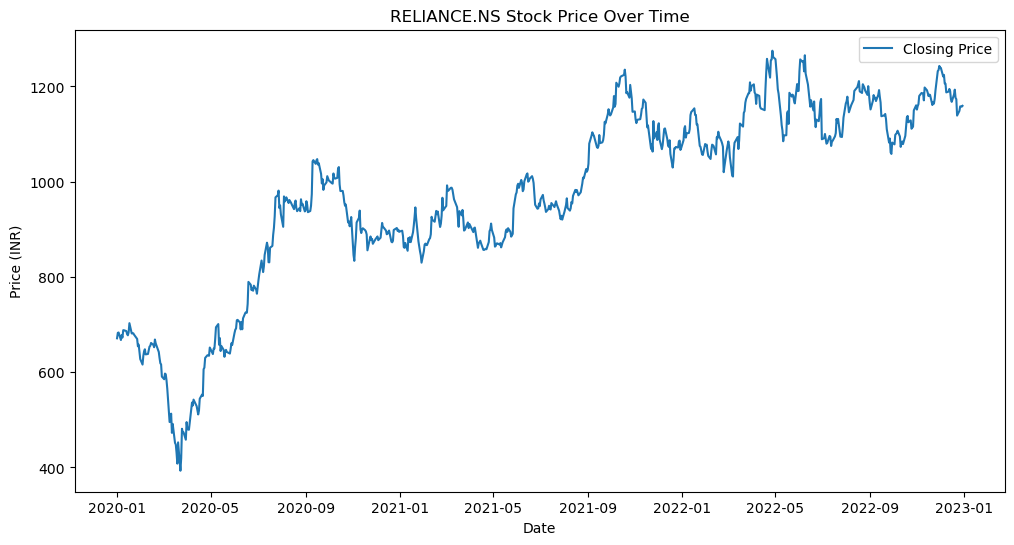

In [13]:
import matplotlib.pyplot as plt

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

Epoch 1/20


c:\Users\vishn\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.4149 - val_loss: 0.2718
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0896 - val_loss: 0.0149
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - val_loss: 0.0039
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016 - val_l

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025382BDBF60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


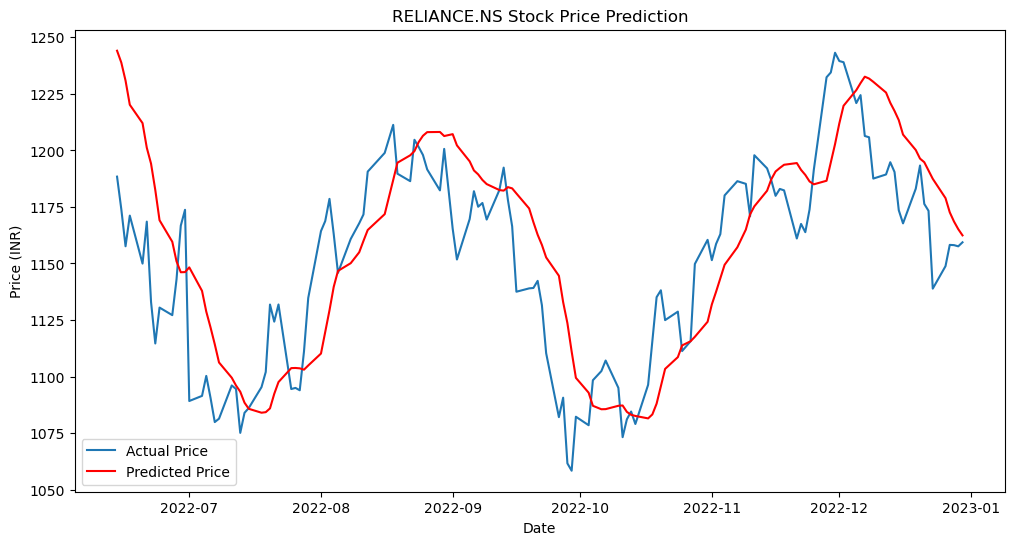

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare the data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']].values)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual Price')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Price', color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

c:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

Mean Squared Error: 2523.911479446451


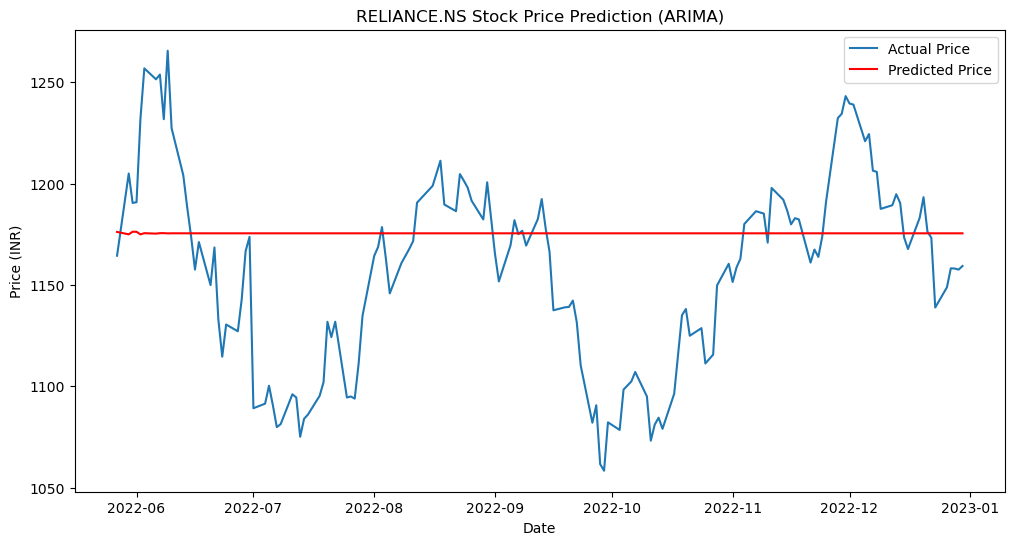

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare the data for ARIMA
close_prices = data['Close']

# Split the data into training and testing sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Example order (p, d, q)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, predictions)
print('Mean Squared Error:', mse)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, predictions, label='Predicted Price', color='red')
plt.title(f'{ticker} Stock Price Prediction (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()